<a href="https://colab.research.google.com/github/LeeSeungwon89/Lecture-and-self-study/blob/master/3-1%20k-%EC%B5%9C%EA%B7%BC%EC%A0%91%20%EC%9D%B4%EC%9B%83%20%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-최근접 이웃 회귀

## 데이터 준비

In [ ]:
import numpy as np

In [ ]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

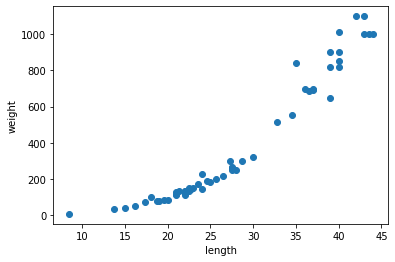

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)

plt.xlabel('length')
plt.ylabel('weight')

plt.show() # 산점도가 고르게 분포함.

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

print(train_input)
print(train_target)

print(test_input)
print(test_target) 

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]
[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]
[ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]
[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


In [ ]:
test_array = np.array([1, 2, 3, 4])

print(test_array)
print(test_array.shape)

test_array_reshape = test_array.reshape(2, 2) # 'np.reshape(test_array, (2, 2))' 와 같음.

print(test_array_reshape)
print(test_array_reshape.shape)

[1 2 3 4]
(4,)
[[1 2]
 [3 4]]
(2, 2)


In [ ]:
# 사이킷런에 사용할 배열은 꼭 2차원이어야 함.
# 2차원으로 바꿔주는 'reshape()' 함수를 이용하여 1차원 배열을 2차원 배열로 변환함.
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

print(train_input, test_input)

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]] [[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


## 결정 계수($R^2$)
$R^2$ = 1 - (타깃 - 예측$)^2$ / (타깃 - 평균$)^2$

- 예측이 타깃에 가까울수록 1에 가까움.

- 평균 정도를 예측한다면 0에 가까움.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor # K-최근접 이웃 회귀 알고리즘을 부름.

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

print(knr.score(train_input, train_target)) # 훈련 세트의 결정계수를 출력함.
print(knr.score(test_input, test_target)) # 테스트 세트의 결정계수를 출력함.

0.9698823289099255
0.9928094061010639


## 예측값과 타깃값 오차

- mean_absolute_error(): 평균 절댓값 오차.

  타깃값에서 예측값을 뺀 절댓값을 평균한 값.

In [ ]:
# 예측한 값과 타깃 사이의 차이를 구하여 어느 정도 빗나가게 예측했는지 확인함.
from sklearn.metrics import mean_absolute_error # 평균 절댓값 오차 계산 도구를 가져옴.

test_prediction = knr.predict(test_input) # 테스트 세트에 대한 예측값을 만듦.

print(test_prediction)

mae = mean_absolute_error(test_target, test_prediction) # 타깃값에서 예측값을 뺀 절댓값을 평균함.

print(mae) # 약 19 정도의 오차가 발생함.

[  60.    79.6  248.   122.   136.   847.   311.4  183.4  847.   113.
 1010.    60.   248.   248. ]
19.157142857142862


## 과대적합과 과소적합

- 과대적합: 훈련 세트에만 잘 맞는 모델. 데이터에 내재된 거시적인 패턴을 감지하지 못함.

  훈련 세트 점수 > 테스트 세트 점수

- 과소적합: 테스트 세트에만 잘 맞는 모델. 데이터가 적을 때 발생 가능성 높음.
  
  훈련 세트 점수 < 테스트 세트 점수 or 훈련 세트 점수와 테스트 세트 점수 모두 낮은 점수

In [ ]:
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))
# 테스트 세트 점수가 훈련 세트 점수보다 높으므로 과소적합임.

0.9698823289099255
0.9928094061010639


## 과소적합 해결하기

In [ ]:
# 이웃의 개수 k를 늘리면 데이터 전반에 있는 일반적인 패턴에 따름.
# 이웃의 개수 k를 줄이면 훈련 세트에 있는 국지적인 패턴에 민감해짐.(과소적합 해결 방법)
knr.n_neighbors = 3 # 이웃의 개수를 기본값 5에서 3으로 줄임.

knr.fit(train_input, train_target) # 모델을 다시 훈련함.

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))
# 과소적합이 해결되었으며 점수 차이도 크지 않음.

0.9804899950518966
0.974645996398761


## 마무리

### 핵심 패키지와 함수

- mean_squared_error(): 평균 제곱 오차.

  타깃값에서 예측값을 뺀 값을 제곱하여 평균한 값.

### 확인문제 2

1. k-최근접 이웃 회귀 모델의 k값을 1, 5, 10으로 바꿔가며 훈련하라.

1. 농어의 길이를 5에서 45까지 바꿔가며 예측을 만들어 그래프로 나타내라.

[[ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]]
[  32.   32.   32.   32.   32.   32.   32.   32.   32.   32.   40.   40.
   70.   70.   80.   85.  115.  135.  150.  225.  180.  197.  260.  260.
  300.  300.  514.  514.  514.  556.  840.  700.  690.  820.  820.  850.
  850. 1100. 1000. 1000. 1000.]
0.9852830341215901
0.991309195814175


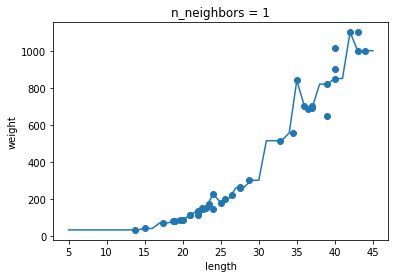

[  60.    60.    60.    60.    60.    60.    60.    60.    60.    60.
   60.    60.    70.6   79.6   79.6   95.   113.   123.   168.   174.
  193.   224.   248.   248.   248.   311.4  379.   582.   659.   659.
  694.2  723.   719.   709.   847.   847.   993.   990.  1010.  1010.
 1010. ]
0.9698823289099255
0.9928094061010639


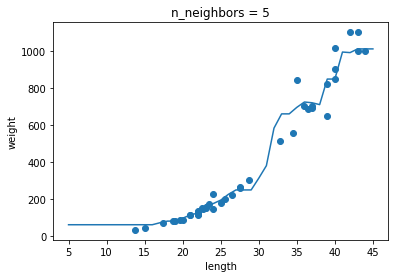

[ 81.5  81.5  81.5  81.5  81.5  81.5  81.5  81.5  81.5  81.5  81.5  81.5
  81.5  91.3 100.8 104.8 116.  128.5 148.  161.2 195.5 211.  211.  247.4
 247.4 347.5 453.5 551.  551.  645.5 700.5 700.5 739.1 785.  811.  882.5
 912.5 912.5 912.5 912.5 912.5]
0.9616456902604301
0.9737908255822255


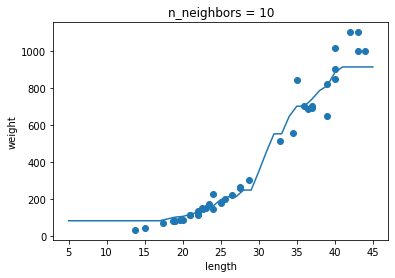

In [ ]:
knr = KNeighborsRegressor()

# 5에서 45까지 농어의 길이인 x좌표를 만듦.
x = np.arange(5, 46).reshape(-1, 1)

print(x)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그림.
for n in [1, 5, 10] :

    knr.n_neighbors = n

    knr.fit(train_input, train_target)

    prediction = knr.predict(x)

    print(prediction)
    
    print(knr.score(train_input, train_target))

    print(knr.score(test_input, test_target))

    plt.scatter(train_input, train_target)

    plt.plot(x, prediction)

    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')

    plt.show()
# n이 커지면 모델이 단순해짐.